# Data Loading

In [56]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib notebook
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
import missingno as msno
from datetime import datetime as dt


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('../Project'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

../Project\DA_Predict_Sales.ipynb
../Project\items.csv
../Project\item_categories.csv
../Project\sales_train.csv
../Project\sample_submission.csv
../Project\shops.csv
../Project\test.csv
../Project\.ipynb_checkpoints\DA_Predict_Sales-checkpoint.ipynb


In [89]:
train2 = pd.read_csv('sales_train.csv', index_col='date', parse_dates= True)
train = pd.read_csv('sales_train.csv')
sample_submission = pd.read_csv('sample_submission.csv')
test = pd.read_csv('test.csv')
items = pd.read_csv('items.csv')
item_categories = pd.read_csv('item_categories.csv')
shops = pd.read_csv('shops.csv')

# Data Cleaning & Data Visualization

In [60]:
def eda(data):
    print("----------Top-5- Record----------")
    print(data.head(5))
    print("-----------Information-----------")
    print(data.info())
    print("-----------Data Types-----------")
    print(data.dtypes)
    print("----------Missing value-----------")
    print(data.isnull().sum())
    print("----------Null value-----------")
    print(data.isna().sum())
    print("----------Shape of Data----------")
    print(data.shape)

def graph_insight(data):
    print(set(data.dtypes.tolist()))
    df_num = data.select_dtypes(include = ['float64', 'int64'])
    df_num.hist(figsize=(16, 16), bins=50, xlabelsize=8, ylabelsize=8);
    
def drop_duplicate(data, subset):
    print('Before drop shape:', data.shape)
    before = data.shape[0]
    data.drop_duplicates(subset,keep='first', inplace=True) #subset is list where you have to put all column for duplicate check
    data.reset_index(drop=True, inplace=True)
    print('After drop shape:', data.shape)
    after = data.shape[0]
    print('Total Duplicate:', before-after)

----------Top-5- Record----------
            date_block_num  shop_id  item_id  item_price  item_cnt_day
date                                                                  
2013-02-01               0       59    22154      999.00           1.0
2013-03-01               0       25     2552      899.00           1.0
2013-05-01               0       25     2552      899.00          -1.0
2013-06-01               0       25     2554     1709.05           1.0
2013-01-15               0       25     2555     1099.00           1.0
-----------Information-----------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2935849 entries, 2013-02-01 to 2015-03-10
Data columns (total 5 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date_block_num  int64  
 1   shop_id         int64  
 2   item_id         int64  
 3   item_price      float64
 4   item_cnt_day    float64
dtypes: float64(2), int64(3)
memory usage: 134.4 MB
None
-----------Data Types-----------
date_block_num 

<IPython.core.display.Javascript object>


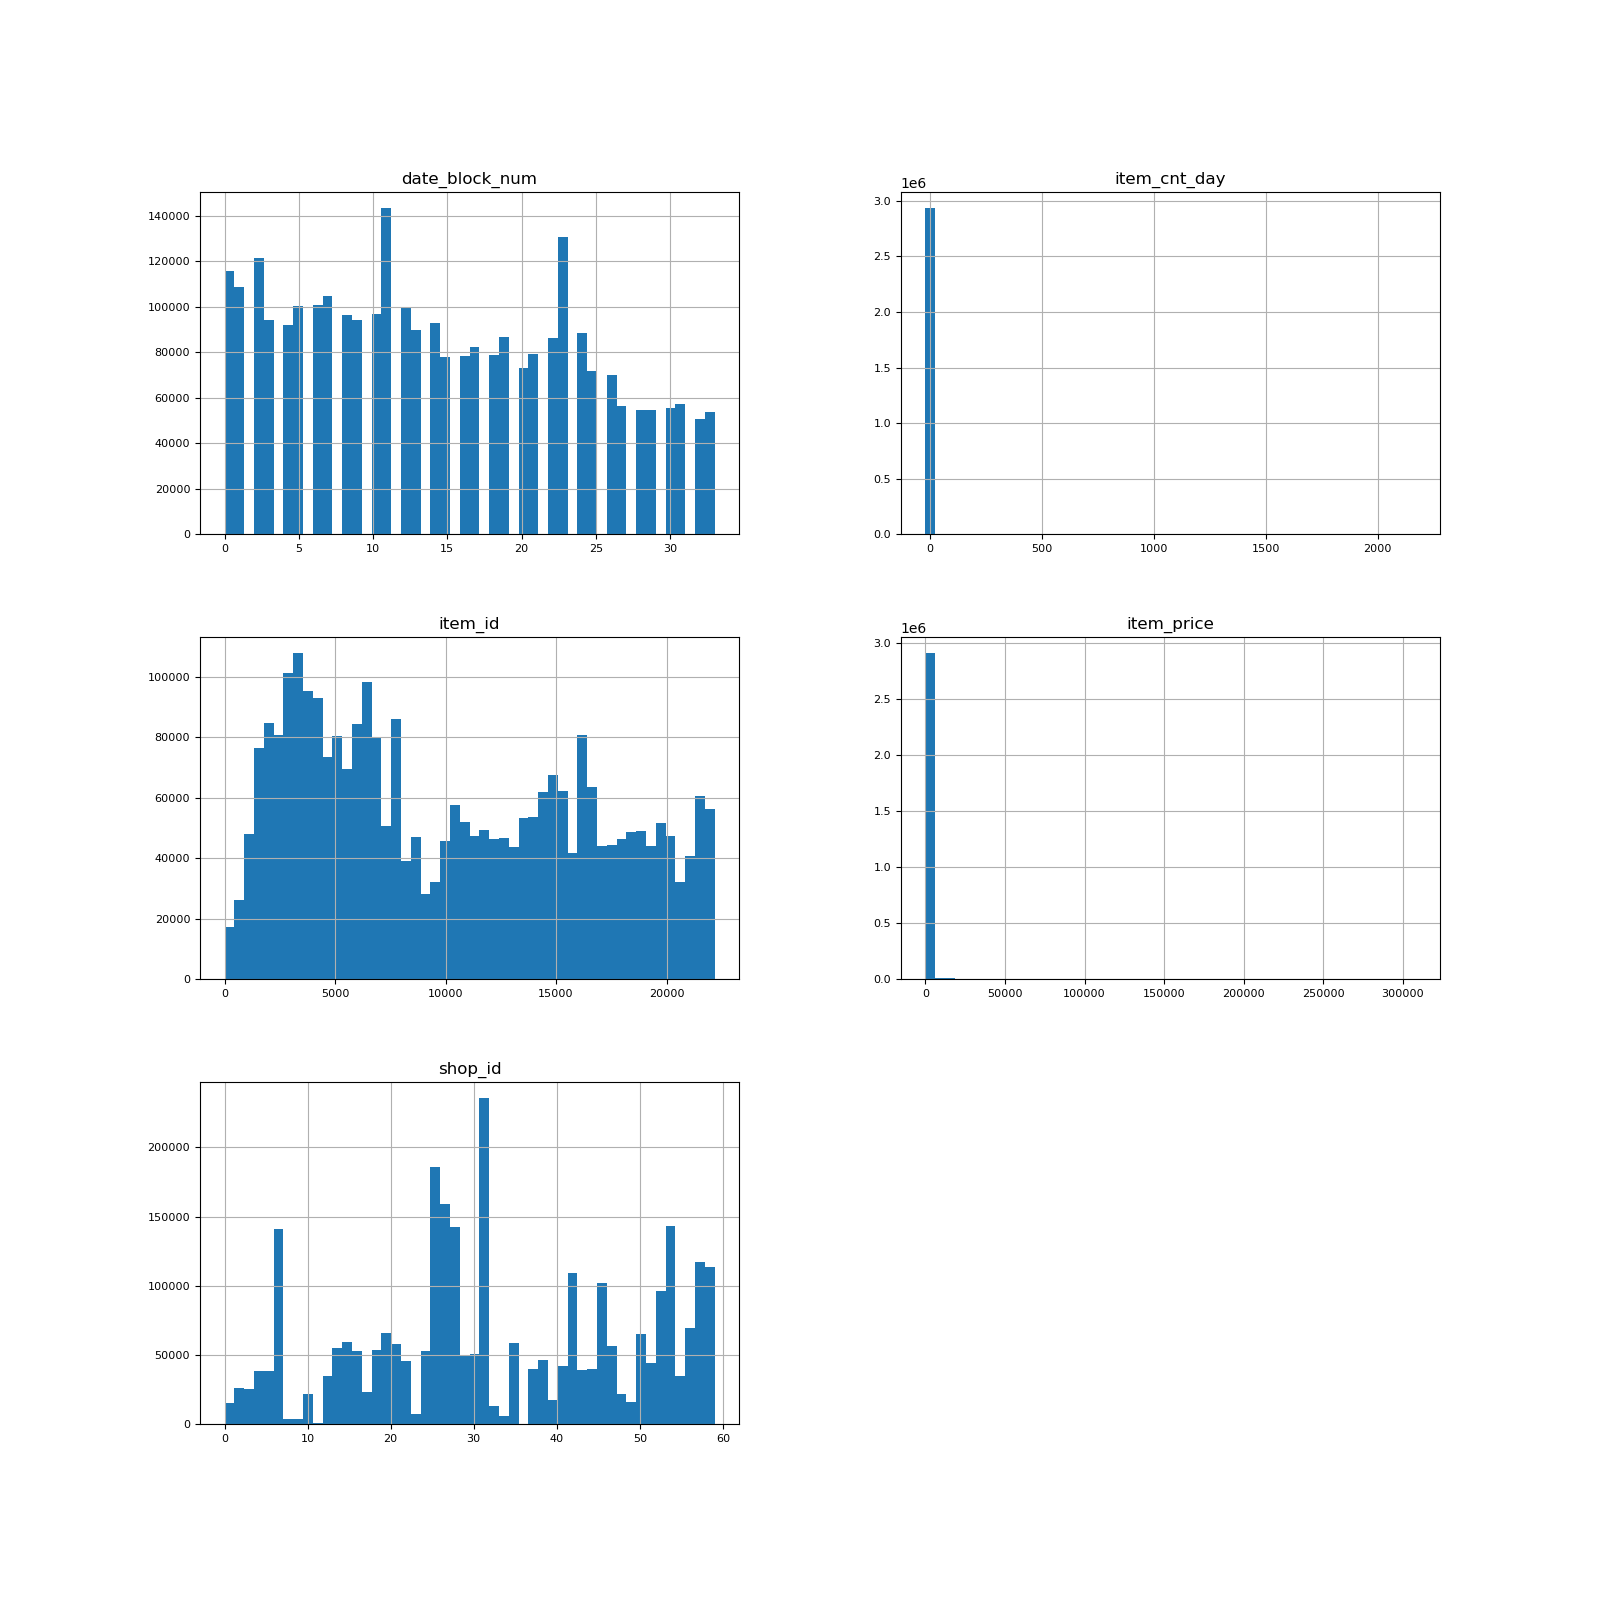

In [61]:
#sales_train insight
eda(train)
graph_insight(train)

In [118]:
train.tail()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2935844,10.10.2015,33,25,7409,299.0,1.0
2935845,09.10.2015,33,25,7460,299.0,1.0
2935846,14.10.2015,33,25,7459,349.0,1.0
2935847,22.10.2015,33,25,7440,299.0,1.0
2935848,03.10.2015,33,25,7460,299.0,1.0


In [119]:
test.head(5)

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [15]:
sample_submission.head()

,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


In [16]:
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [17]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


<IPython.core.display.Javascript object>


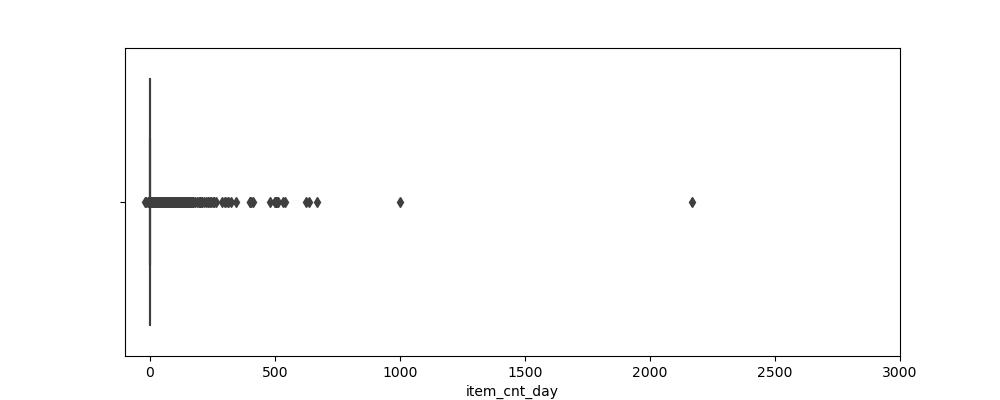

<IPython.core.display.Javascript object>


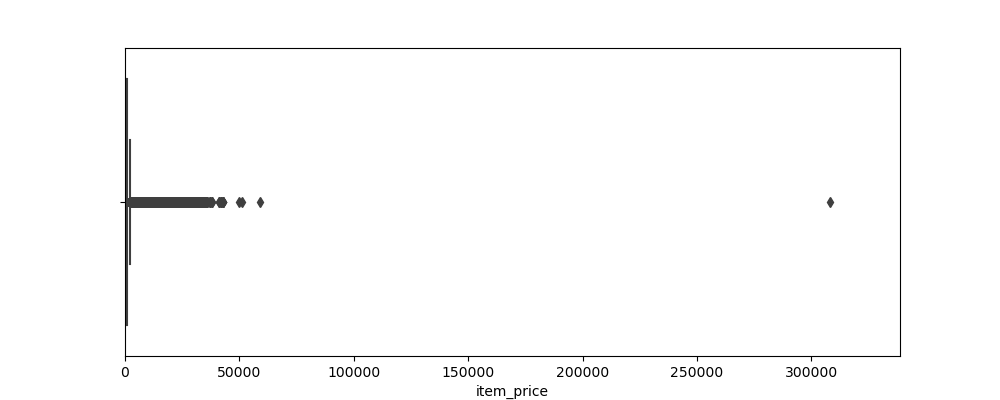

<IPython.core.display.Javascript object>


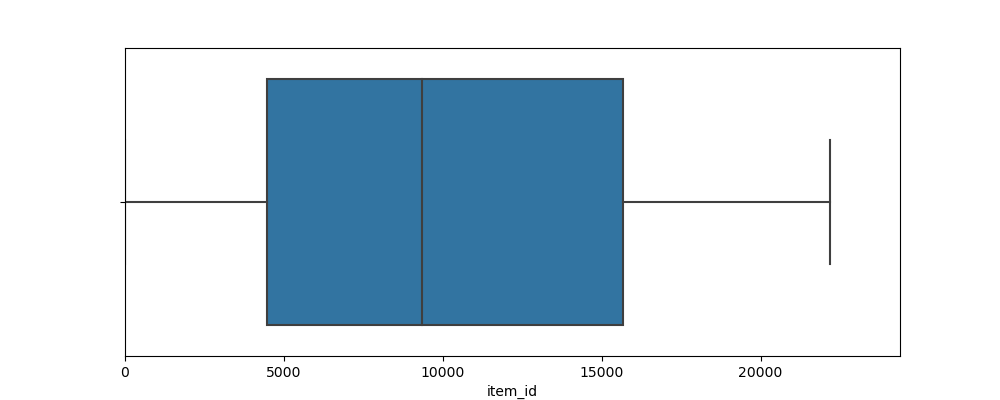

In [87]:
plt.figure(figsize=(10,4))
plt.xlim(-100, 3000)
sns.boxplot(x=train.item_cnt_day)

plt.figure(figsize=(10,4))
plt.xlim(train.item_price.min(), train.item_price.max()*1.1)
sns.boxplot(x=train.item_price)

plt.figure(figsize=(10,4))
plt.xlim(train.item_id.min(), train.item_id.max()*1.1)
sns.boxplot(x=train.item_id)

In [64]:
print(sorted(train['item_cnt_day'].unique()))

[-22.0, -16.0, -9.0, -6.0, -5.0, -4.0, -3.0, -2.0, -1.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 121.0, 124.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 138.0, 139.0, 140.0, 142.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 153.0, 154.0, 156.0, 157.0, 161.0, 163.0, 164.0, 167.0, 168.0, 171.0, 

In [68]:
print(sorted(train['item_price'].unique()))

[-1.0, 0.07, 0.0875, 0.09, 0.1, 0.2, 0.5, 0.9087136929459999, 0.99, 1.0, 1.83, 2.0, 2.99, 3.0, 3.57, 3.59, 3.64, 3.67, 3.69, 3.71, 3.72, 3.8, 4.0, 4.029126213590001, 4.05555555556, 4.1428571428600005, 4.23529411765, 4.3, 4.33333333333, 4.4, 4.46666666667, 4.5, 4.527777777780001, 4.5625, 4.57142857143, 4.66666666667, 4.69375, 4.71, 4.71428571429, 4.75, 4.760383386580001, 4.777777777780001, 4.79, 4.795, 4.8, 4.8125, 4.81818181818, 4.825, 4.83333333333, 4.85, 4.8571428571399995, 4.86363636364, 4.86666666667, 4.875, 4.8825, 4.88888888889, 4.8928571428600005, 4.9, 4.909090909090001, 4.91666666667, 4.92307692308, 4.9275, 4.92857142857, 4.93333333333, 4.93518518519, 4.9375, 4.93833333333, 4.94117647059, 4.94230769231, 4.94444444444, 4.94594594595, 4.94642857143, 4.94736842105, 4.94888888889, 4.95, 4.95238095238, 4.95384615385, 4.95454545455, 4.95833333333, 4.96, 4.96153846154, 4.96428571429, 4.967, 4.96774193548, 4.96875, 4.9696969697, 4.972222222219999, 4.97435897436, 4.975, 4.97727272727, 4

In [71]:
train_clean = train.drop(train[train['item_cnt_day'] < 0].index)
train_clean2 = train_clean.drop(train_clean[train_clean['item_price'] < 0].index)
train_clean2

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
5,10.01.2013,0,25,2564,349.00,1.0
...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0
2935845,09.10.2015,33,25,7460,299.00,1.0
2935846,14.10.2015,33,25,7459,349.00,1.0
2935847,22.10.2015,33,25,7440,299.00,1.0


In [83]:
ts = train_clean2[['date_block_num','item_cnt_day']]
ts.set_index('date_block_num', inplace=True)
ts

,item_cnt_day
date_block_num,
0,1.0
0,1.0
0,1.0
0,1.0
0,1.0
...,...
33,1.0
33,1.0
33,1.0


<IPython.core.display.Javascript object>


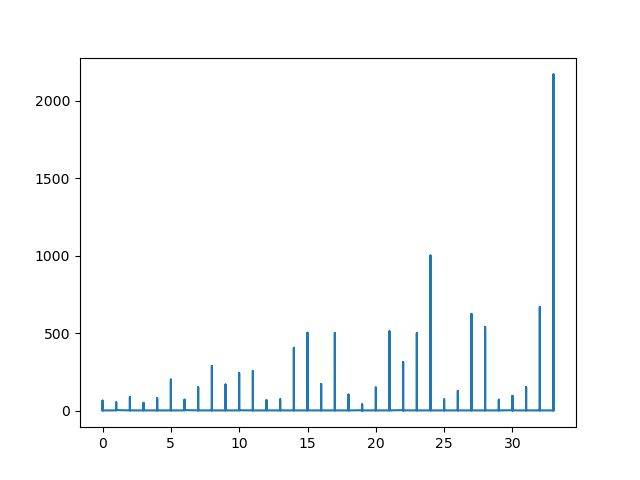

In [88]:
# # display the item cnt day per month (33 months from January 2013 to October 2015)
plt.figure()
plt.plot(ts)
plt.show()

In [92]:
train2.index
ts2=train2['item_cnt_day']
ts2.head(10)

date
2013-02-01    1.0
2013-03-01    1.0
2013-05-01   -1.0
2013-06-01    1.0
2013-01-15    1.0
2013-10-01    1.0
2013-02-01    1.0
2013-04-01    1.0
2013-11-01    1.0
2013-03-01    3.0
Name: item_cnt_day, dtype: float64

In [99]:
ts2['2015']

date
2015-07-01    1.0
2015-02-01    1.0
2015-01-25    1.0
2015-01-24    1.0
2015-04-01    1.0
             ... 
2015-10-10    1.0
2015-09-10    1.0
2015-10-14    1.0
2015-10-22    1.0
2015-03-10    1.0
Name: item_cnt_day, Length: 612426, dtype: float64

<IPython.core.display.Javascript object>


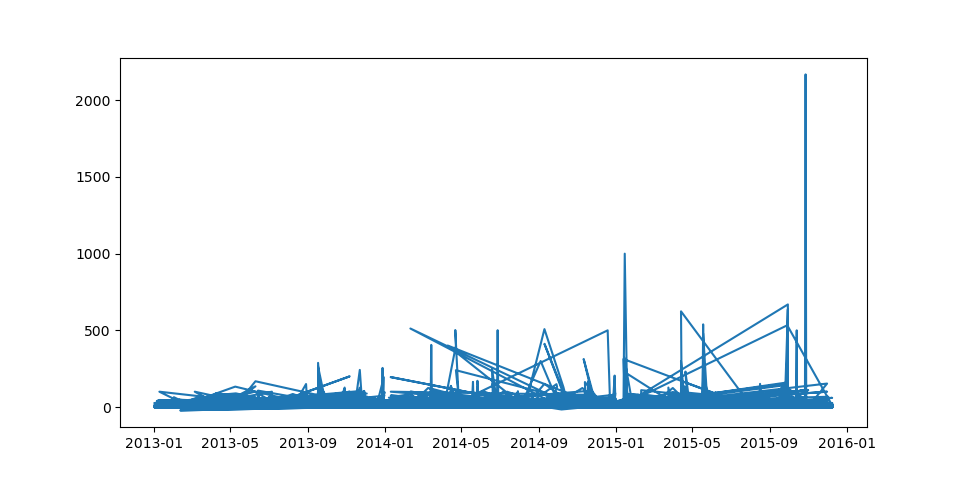

In [97]:
plt.figure()
plt.plot(ts2)
plt.show()

In [102]:
gp_train = train_clean2.groupby(['date_block_num', 'shop_id', 'item_id']).agg({'item_cnt_day': ['sum']})
gp_train.head(10)
gp_train.tail(10)
gp_train

# # HW: plot multidimensional bar chart grouped by shop_id,item_id, x =date_block_num; y= item_cnt_day

item_cnt_day
                                        sum
date_block_num shop_id item_id             
0              0       32               6.0
                       33               3.0
                       35               1.0
                       43               1.0
                       51               2.0
...                                     ...
33             59      22087            6.0
                       22088            2.0
                       22091            1.0
                       22100            1.0
                       22102            1.0

[1608226 rows x 1 columns]

In [41]:
print(sorted(train_clean2['item_price'].unique()))

[0.07, 0.0875, 0.09, 0.1, 0.2, 0.5, 0.9087136929459999, 0.99, 1.0, 1.83, 2.0, 2.99, 3.0, 3.57, 3.59, 3.64, 3.67, 3.69, 3.71, 3.72, 3.8, 4.0, 4.029126213590001, 4.05555555556, 4.1428571428600005, 4.23529411765, 4.3, 4.33333333333, 4.4, 4.46666666667, 4.5, 4.527777777780001, 4.5625, 4.57142857143, 4.66666666667, 4.69375, 4.71, 4.71428571429, 4.75, 4.760383386580001, 4.777777777780001, 4.79, 4.795, 4.8, 4.8125, 4.81818181818, 4.825, 4.83333333333, 4.85, 4.8571428571399995, 4.86363636364, 4.86666666667, 4.875, 4.8825, 4.88888888889, 4.8928571428600005, 4.9, 4.909090909090001, 4.91666666667, 4.92307692308, 4.9275, 4.92857142857, 4.93333333333, 4.93518518519, 4.9375, 4.93833333333, 4.94117647059, 4.94230769231, 4.94444444444, 4.94594594595, 4.94642857143, 4.94736842105, 4.94888888889, 4.95, 4.95238095238, 4.95384615385, 4.95454545455, 4.95833333333, 4.96, 4.96153846154, 4.96428571429, 4.967, 4.96774193548, 4.96875, 4.9696969697, 4.972222222219999, 4.97435897436, 4.975, 4.97727272727, 4.97916

In [43]:
print(sorted(train_clean2['item_cnt_day'].unique()))

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 121.0, 124.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 138.0, 139.0, 140.0, 142.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 153.0, 154.0, 156.0, 157.0, 161.0, 163.0, 164.0, 167.0, 168.0, 171.0, 179.0, 187.0, 194.0, 195.0, 200.0, 205.0, 207.0, 217.0, 

<IPython.core.display.Javascript object>


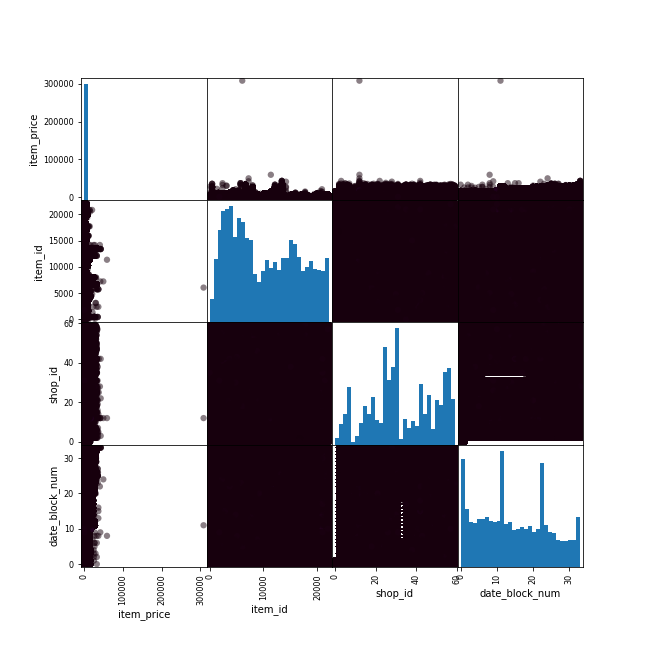

In [13]:
# plotting a scatter matrix
from matplotlib import cm
from pandas.plotting import scatter_matrix

# pd.plotting.scatter_matrix(sale_train, alpha=0.2, figsize=(10, 10))

X = sale_train[['item_price','item_id','shop_id','date_block_num']]
y = sale_train['item_cnt_day']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

seed=1234
cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X_train, c= y_train, marker = 'o', s=40, hist_kwds={'bins':30}, figsize=(9,9), cmap=cmap)

<IPython.core.display.Javascript object>


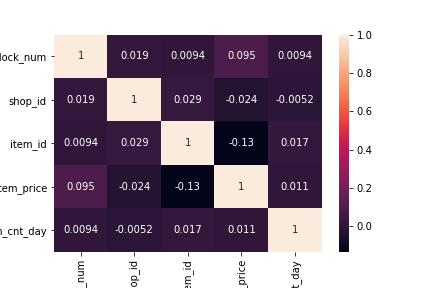

In [4]:
corrMatrix = sale_train.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

# Check Stationarity of a Time Series

In [110]:
ts

,item_cnt_day
date_block_num,
0,1.0
0,1.0
0,1.0
0,1.0
0,1.0
...,...
33,1.0
33,1.0
33,1.0


In [116]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    ts_log = np.log(timeseries)
    
    #Determing rolling statistics
    rolmean = ts_log.rolling(12).std()
    rolstd = ts_log.rolling(12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [117]:
test_stationarity(ts)

Results of Dickey-Fuller Test:


MemoryError: Unable to allocate 3.47 GiB for an array with shape (2928334, 159) and data type float64